<a href="https://colab.research.google.com/github/etappau/info5731/blob/master/Buxton_retail_location_largeStores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import warnings
warnings.filterwarnings("ignore")


In [0]:
import numpy as np
import sklearn
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Book1.csv to Book1.csv


reading the data

In [0]:
df = pd.read_csv('Book1.csv', encoding = 'utf8', index_col = 'SID')

checking for null values

In [0]:
df.isnull().sum()

In [0]:
list(df)

In [0]:
df['SQFT'] = df['SQFT'].str.replace(",","")

In [0]:
df.SQFT

In [0]:
df['SALES_2018'] = df['SALES_2018'].str.replace(",","")
df['SALES_2018'] = df['SALES_2018'].str.replace("$","")

In [0]:
df.SALES_2018

In [96]:
df.shape

(47, 442)

In [97]:
#stats of the predictor variable (saleprice)
df.SALES_2018.describe().round(2)

count          47.00
mean      7819204.36
std       1721631.19
min       5590958.61
25%       6548282.40
50%       7534766.44
75%       8563711.40
max      13304391.49
Name: SALES_2018, dtype: float64

In [98]:
#overview ofthe data
df.head()

,SQFT,SALES_2018,AGE_ADULT18P_8TO,AGE_ADULT18P_16TO,AGE_BABYBOOM5069_8TO,AGE_BABYBOOM5069_16TO,AGE_COLLG1821_8TO,AGE_COLLG1821_16TO,AGE_DRINKADULT21P_8TO,AGE_DRINKADULT21P_16TO,...,XRACE_WHTHH_1RO,XRACE_WHTHH_8TO,XRACE_WHTHH_16TO,XRACE_WHTPOP_1RO,XRACE_WHTPOP_8TO,XRACE_WHTPOP_16TO,CUSTOMER_VALUE,CUSTOMER_VALUE_QUAL,CUSTOMER_VALUE_W,CUSTOMER_VALUE_W_QUAL
SID,,,,,,,,,,,,,,,,,,,,,
21266496,52860.90,6585541.547,22452,62057,7866,21397,1163,5387,21627,58191,...,94.95,91.82,94.09,94.28,89.81,92.62,5213824.657,800.612281,2599706.687,503.137811
21266497,50398.75,7580096.470,23272,51235,7276,15811,1482,5381,22265,47310,...,96.78,93.90,94.78,95.75,84.17,88.18,4235039.571,812.681598,5430226.190,537.169742
21266498,45520.45,7538989.577,16522,39299,5693,13571,845,2070,15885,37760,...,96.04,95.03,95.91,94.65,93.82,95.01,3047761.341,682.624844,3323540.336,450.886607
21266499,53871.75,6917103.109,8465,57556,3237,20061,413,3647,8163,54912,...,95.62,95.13,94.61,94.63,93.82,91.26,3540146.551,713.330105,4296301.151,493.884005
21266500,62109.20,8395815.468,25324,139069,8964,48638,1193,6816,24437,134014,...,96.42,91.56,87.68,95.78,89.82,85.27,8887719.173,700.441060,5641977.409,480.374930


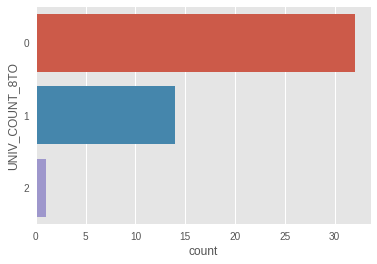

In [88]:
sns.countplot(y='UNIV_COUNT_8TO', data=df)

In [0]:
sns.countplot(y='UNIV_COUNT_16TO', data=df)

In [0]:
sns.countplot(x='SCHOOL_HI_SCHLS_0_5RO', data=df)

In [101]:
df.describe()

,SQFT,SALES_2018,AGE_ADULT18P_8TO,AGE_ADULT18P_16TO,AGE_BABYBOOM5069_8TO,AGE_BABYBOOM5069_16TO,AGE_COLLG1821_8TO,AGE_COLLG1821_16TO,AGE_DRINKADULT21P_8TO,AGE_DRINKADULT21P_16TO,...,XRACE_WHTHH_1RO,XRACE_WHTHH_8TO,XRACE_WHTHH_16TO,XRACE_WHTPOP_1RO,XRACE_WHTPOP_8TO,XRACE_WHTPOP_16TO,CUSTOMER_VALUE,CUSTOMER_VALUE_QUAL,CUSTOMER_VALUE_W,CUSTOMER_VALUE_W_QUAL
count,47.000000,4.700000e+01,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,...,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,4.700000e+01,47.000000,4.700000e+01,47.000000
mean,56364.168723,7.819204e+06,30470.382979,126653.000000,9392.276596,40347.468085,2381.255319,9521.574468,28715.361702,119618.212766,...,85.433830,83.642553,82.259362,82.736383,80.628511,79.215106,7.491483e+06,630.832482,7.813276e+06,464.623886
std,8237.829137,1.721631e+06,9855.812027,57200.975763,3256.683213,17825.089366,2055.781386,4975.201817,9359.507801,54212.589409,...,13.098405,12.767285,12.491992,14.021185,13.287011,12.981830,2.738795e+06,72.251464,4.324669e+06,30.050067
min,45520.450000,5.590959e+06,8465.000000,39299.000000,3237.000000,13481.000000,413.000000,2070.000000,8163.000000,37760.000000,...,39.470000,36.650000,41.370000,35.200000,34.980000,37.510000,3.047761e+06,502.732183,2.599707e+06,401.038120
25%,50039.375000,6.548282e+06,23967.500000,73208.500000,7328.500000,24347.000000,1243.500000,5965.000000,22543.500000,69648.000000,...,81.635000,78.695000,74.490000,78.245000,75.085000,70.080000,5.254681e+06,589.430138,5.200005e+06,444.080844
50%,53951.100000,7.534766e+06,30146.000000,126188.000000,9026.000000,39681.000000,1780.000000,8668.000000,28849.000000,119358.000000,...,90.080000,87.670000,86.860000,89.300000,84.430000,83.630000,7.498199e+06,629.901989,7.075286e+06,464.137700
75%,60595.225000,8.563711e+06,37856.000000,162992.500000,10996.500000,51773.500000,2532.000000,11821.500000,35210.000000,152796.000000,...,94.155000,92.970000,91.800000,92.755000,90.500000,89.265000,9.120402e+06,674.243468,8.734435e+06,484.949998
max,86695.050000,1.330439e+07,50859.000000,273114.000000,15996.000000,93057.000000,12079.000000,24413.000000,48904.000000,260510.000000,...,97.470000,96.820000,96.630000,96.350000,95.340000,95.010000,1.341490e+07,812.681598,2.562182e+07,537.169742


In [102]:
#features with the most correlation with the predictor variable
corr = df.corr()
print(corr['SALES_2018'].sort_values(ascending = False)[:10], '\n')
print(corr['SALES_2018'].sort_values(ascending = False)[-5:])

SALES_2018                 1.000000
SQFT                       0.599724
XEDUC_PRO_16TO             0.318752
XLABOR_SRV_16TO            0.246431
XEDUC_PRO_8TO              0.238219
SCHOOL_MID_STDNTS_0_5RO    0.224693
XHVAL_L49K_16TO            0.224262
CM_GROCERY_1RO             0.211012
HVAL_MED_COLADJ_8TO        0.206517
HVAL_MED_COLADJ_16TO       0.202479
Name: SALES_2018, dtype: float64 

CX02V051_8TO      -0.317043
LABOR_BLU_16TO    -0.325680
CNT_MALLS_1RO     -0.378144
LABOR_BLU_8TO     -0.420733
CNT_MALLS_0_5RO   -0.444566
Name: SALES_2018, dtype: float64


In [0]:
corr_with_sales = df.corr()["SALES_2018"].sort_values(ascending=False)
plt.figure(figsize=(20,12))
corr_with_sales.drop("SALES_2018").plot.bar()
plt.show();

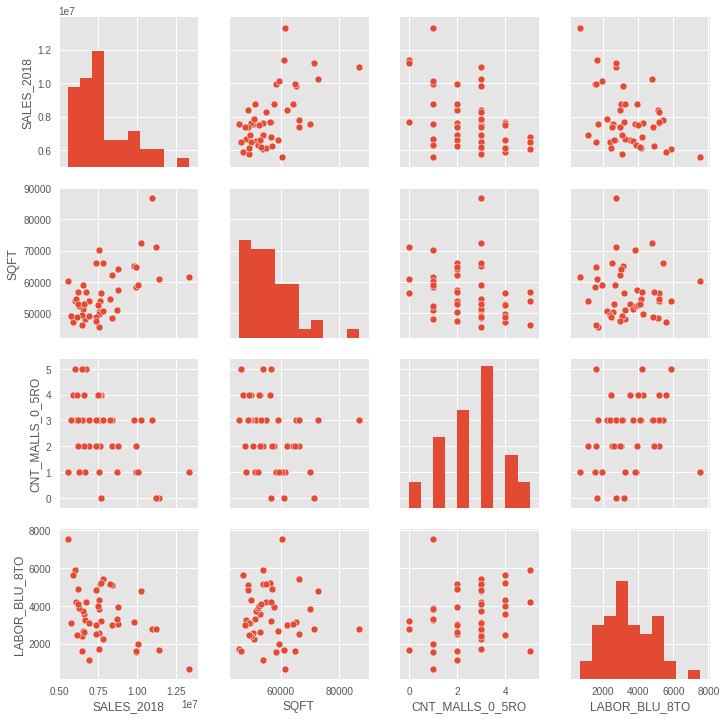

In [106]:
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(df[['SALES_2018', 'SQFT', 'CNT_MALLS_0_5RO', 'LABOR_BLU_8TO']])
plt.show();

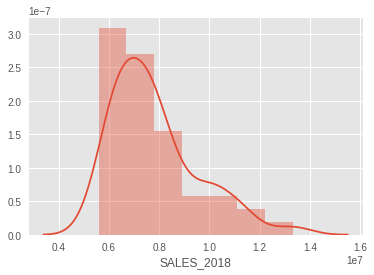

In [89]:
# skew and kurtosis
sns.distplot(df.SALES_2018)
plt.show();

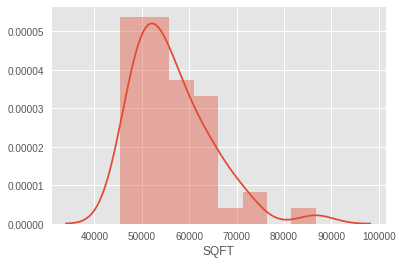

In [90]:
# skew and kurtosis
sns.distplot(df.SQFT)
plt.show();

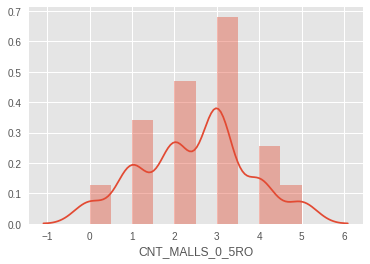

In [91]:
# skew and kurtosis
sns.distplot(df.CNT_MALLS_0_5RO)
plt.show();

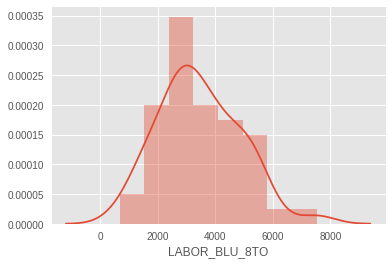

In [92]:
# skew and kurtosis
sns.distplot(df.LABOR_BLU_8TO)
plt.show();

In [0]:
y = df.iloc[:, 1]
X = df.loc[:, df.columns != 'SALES_2018']

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

In [109]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(42, 3)
(5, 3)
(42,)
(5,)


In [0]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [130]:
# Instantiate model
lm2 = LinearRegression()

# Fit Model
lm2.fit(X_train, y_train)

# Predict
y_pred = lm2.predict(X_test)

# RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

3180934.07618773


441 features, reduction of 0.00%


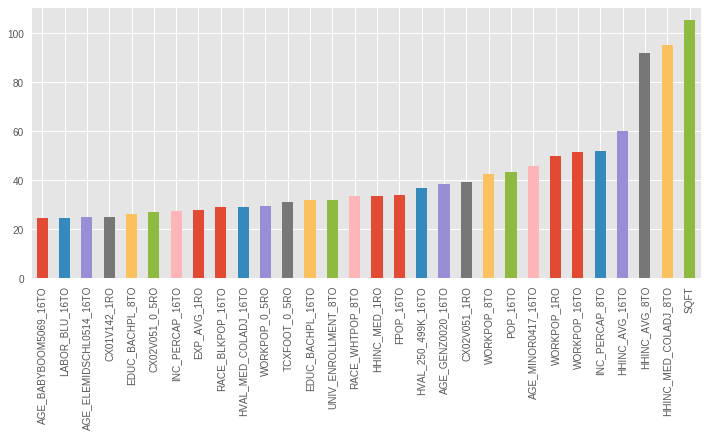

In [131]:
feature_importance = pd.Series(index = X_train.columns, data = np.abs(lm2.coef_))

n_selected_features = (feature_importance>0).sum()
print('{0:d} features, reduction of {1:2.2f}%'.format(
    n_selected_features,(1-n_selected_features/len(feature_importance))*100))

feature_importance.sort_values().tail(30).plot(kind = 'bar', figsize = (12,5));

LR picked 441 features and eliminated the other 0 features


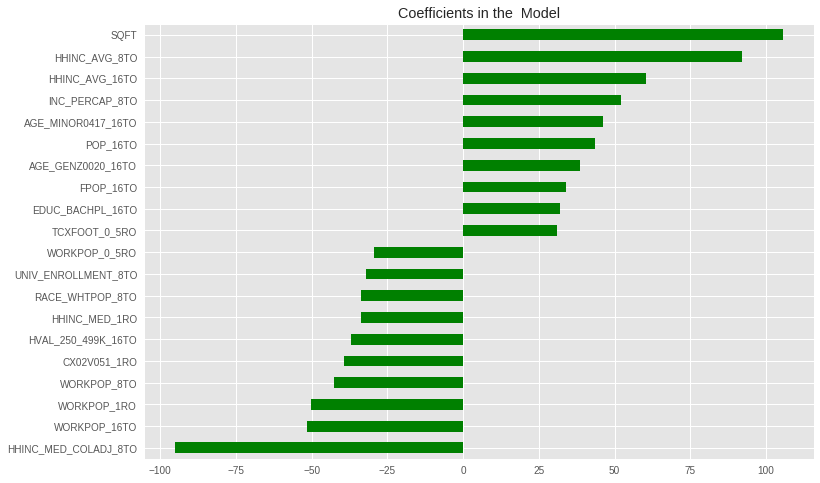

In [132]:
# Plot coefficients in order of importance
coefs = pd.Series(lm2.coef_, index = X_train.columns)
print("LR picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  \
      str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh",figsize =(12,8), color = "green")
plt.title("Coefficients in the  Model")
plt.show()

In [0]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_regression

def select_kbest_reg(data_frame, target, k=5):
    """
    Selecting K-Best features regression
    :param data_frame: A pandas dataFrame with the training data
    :param target: target variable name in DataFrame
    :param k: desired number of features from the data
    :returns feature_scores: scores for each feature in the data as 
    pandas DataFrame
    """
    feat_selector = SelectKBest(f_regression, k=k)
    _ = feat_selector.fit(data_frame.drop(target, axis=1), data_frame[target])
    
    feat_scores = pd.DataFrame()
    feat_scores["F Score"] = feat_selector.scores_
    feat_scores["P Value"] = feat_selector.pvalues_
    feat_scores["Support"] = feat_selector.get_support()
    feat_scores["Attribute"] = data_frame.drop(target, axis=1).columns
    
    return feat_scores

In [137]:
per_feat = select_kbest_reg(df, 'SALES_2018', k=5)
per_feat = per_feat.sort_values(["F Score", "P Value"], ascending=[False, False])
print("\n Feature Score using regression\n")
print(per_feat)


 Feature Score using regression

       F Score   P Value  Support               Attribute
0    25.276098  0.000008     True                    SQFT
72   11.084478  0.001744     True         CNT_MALLS_0_5RO
197   9.679072  0.003232     True           LABOR_BLU_8TO
73    7.508323  0.008774     True           CNT_MALLS_1RO
198   5.339386  0.025488     True          LABOR_BLU_16TO
350   5.089200  0.028983    False          XEDUC_PRO_16TO
91    5.028681  0.029904    False            CX02V051_8TO
396   4.970037  0.030826    False          XLABOR_BLU_8TO
163   4.969980  0.030827    False               HHSZ4_8TO
36    4.877123  0.032351    False          AWMNSGRLS_16TO
96    4.800521  0.033670    False          EDUC_ASSCT_8TO
196   4.756890  0.034448    False           LABOR_BLU_1RO
165   4.672976  0.035998    False               HHSZ5_8TO
159   4.661136  0.036222    False              HHSZ3P_8TO
334   4.506590  0.039299    False         XEDUC_ASSCT_8TO
74    4.433887  0.040844    False    C

In [138]:
# Include only the top 5
X = df[['SQFT', 'CNT_MALLS_0_5RO', 'LABOR_BLU_8TO', 'CNT_MALLS_1RO', 'LABOR_BLU_16TO']]
y = df.SALES_2018

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)
# Instantiate model
lm2 = LinearRegression()

# Fit model
lm2.fit(X_train, y_train)

# Predict
y_pred = lm2.predict(X_test)

# RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1270219.3944479183


In [139]:
# Include only the top 3
X = df[['SQFT', 'CNT_MALLS_0_5RO', 'LABOR_BLU_8TO']]
y = df.SALES_2018

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)
# Instantiate model
lm2 = LinearRegression()

# Fit model
lm2.fit(X_train, y_train)

# Predict
y_pred = lm2.predict(X_test)

# RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1324400.8817444514


In [140]:
### SCIKIT-LEARN ###

# create X and y
feature_cols = ['SQFT', 'CNT_MALLS_0_5RO', 'LABOR_BLU_8TO']
X = df[feature_cols]
y = df.SALES_2018

# instantiate and fit
lm2 = LinearRegression()
lm2.fit(X, y)

# print the coefficients
print(lm2.intercept_)
print(lm2.coef_)

3686938.6385134393
[ 1.10521311e+02 -2.58475345e+05 -4.21386179e+02]


In [141]:
# pair the feature names with the coefficients
list(zip(feature_cols, lm2.coef_))

[('SQFT', 110.52131126509482),
 ('CNT_MALLS_0_5RO', -258475.34522145378),
 ('LABOR_BLU_8TO', -421.3861789452203)]

In [142]:
# make predictions on the testing set
y_pred = lm2.predict(X_test)
y_pred

array([9658896.96021743, 9557295.90192148, 7573849.34620508,
       8784968.15312398, 6693450.56831328])

In [143]:
y_test

SID
21266527    9940540.760
23074141    7534766.440
21266529    6311022.678
21266500    8395815.468
21266515    7681813.486
Name: SALES_2018, dtype: float64